# Cat-Dog Classification Using Convolution Neural Network

## Flow of the program below:
* Import all the necessary packages
* Develop the model/classifier that we will be using
* Extract and pre-process data
* Train the model using the data
* Analyze working of the model
* Conclusion

In [1]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras import optimizers
from sklearn.metrics import confusion_matrix 
import cv2
import pickle
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Architecture of the model being used
![architecture](resources/architecture.jpg)

#### Model parameters:
* loss function: binary_crossentropy
* optimizer: adam

In [2]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Conv2D(32,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total para

sample images of cat and dog after rescaling:


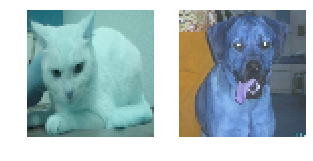

In [3]:
def load_train(filepath):
    os.chdir(filepath)
    
    cat_train=[]
    dog_train=[]
    
    image=os.listdir()
    for img in image:
        X=cv2.imread(img)
        X=cv2.resize(X,(64,64))
        X=X/255.0
        if "cat" in img:
            cat_train.append(X)
        else:
            dog_train.append(X)
            
    cat_train=np.array(cat_train)
    dog_train=np.array(dog_train)
    
    return (cat_train,dog_train)
    
def load_test(filepath):
    os.chdir(filepath)
    image=os.listdir()
    
    test=[]
    
    for img in image:
        X=cv2.imread(img)
        X=cv2.resize(X,(64,64))
        X=X/255.0
        test.append(X)
    
    test=np.array(test)
    
    return (test)

train_path="kaggle\\dogs-vs-cats\\train_few"
cat,dog=load_train(train_path)

print('sample images of cat and dog after rescaling:')
fig=plt.figure(figsize=(5,5))
fig.add_subplot(1,2,1)
plt.axis('off')
plt.imshow(cat[6],cmap="gray")
fig.add_subplot(1,2,2)
plt.axis('off')
plt.imshow(dog[25],cmap="gray")
plt.show()

In [5]:
xtrain=np.concatenate((cat,dog),0)
ytrain=np.asarray([1 if i<len(cat) else 0 for i in range(len(cat)+len(dog))])

#model.fit(xtrain,ytrain,batch_size=8,epochs=5,shuffle=1,validation_split=0.2)

#The above command is to train the model, however since many trails were needed to reach a satisfactory result it has
#not been shown here and we are using one of the trained model that yielded better results compared to the others.


### Loading one of the pre-trained models which yields better performance compared to the others. The model architecture is the kept the same .

In [6]:
os.chdir("kaggle")
model = load_model('dogcat_model.h5')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total para

### Checking output for a sample image and its performance on the testdata

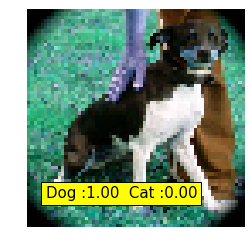

In [7]:
test_path="kaggle\\dogs-vs-cats\\train_few"
cat,dog=load_train(test_path)
xtest=np.concatenate((cat,dog),0)
ylabel=np.asarray([1 if i<len(cat) else 0 for i in range(len(cat)+len(dog))])
img=np.expand_dims(xtest[163],axis=0)
pred_val = model.predict(img)

value ='Dog :%1.2f  Cat :%1.2f'%(pred_val,1.0-pred_val)
plt.text(5, 55,value,color='black',fontsize=15,bbox=dict(facecolor='yellow'))

plt.imshow(xtest[163])
plt.axis('off')
plt.show()

In [12]:
ytest=model.predict(xtest)
ytest=[1 if i<0.5 else 0 for i in ytest]
result=model.evaluate(xtest,ylabel)
print('Validation Accuracy: %1.2f%%     Validation loss: %1.4f'%(result[0]*10,result[1]))


202/202 [==============================] - 1s 6ms/step
Validation Accuracy: 79.94%     Validation loss: 0.2079


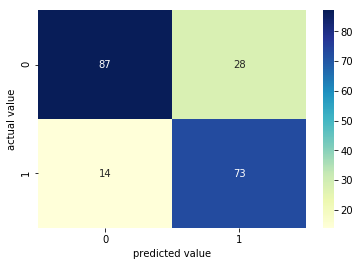

In [13]:
conf_matrix = confusion_matrix(ytest,ylabel)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('actual value');

### Let us check few classification results

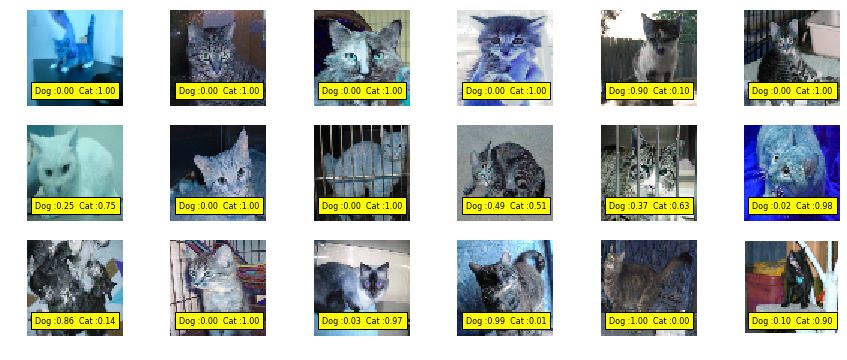

In [14]:
fig=plt.figure(figsize=(15, 6))
columns = 6
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    img1 = xtest[i]
    img = np.expand_dims(img1, axis=0)
    pred_val = model.predict(img) #gives all class prob.

    value ='Dog :%1.2f  Cat :%1.2f'%(pred_val,1.0-pred_val)
    plt.text(5, 55,value,color='black',fontsize=8,bbox=dict(facecolor='yellow'))
    plt.imshow(img1)


### Analyzing the Convolution outputs for a particular input

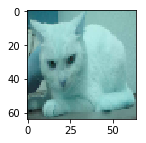

Output for each filter of first Convolution Layer


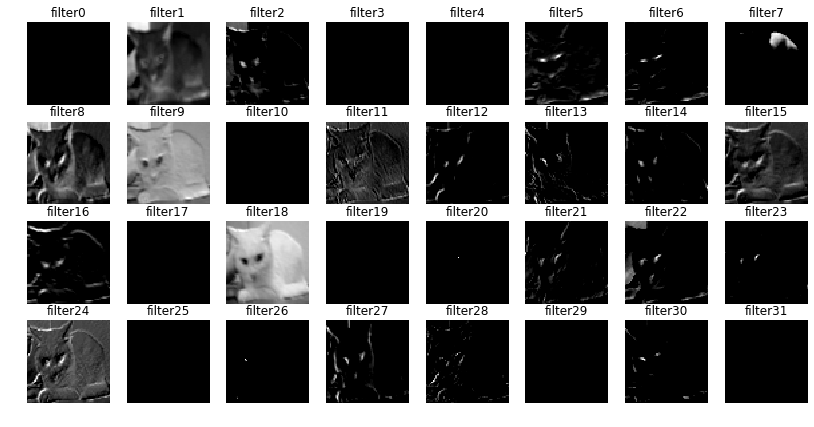

Output for each filter of second Convolution Layer


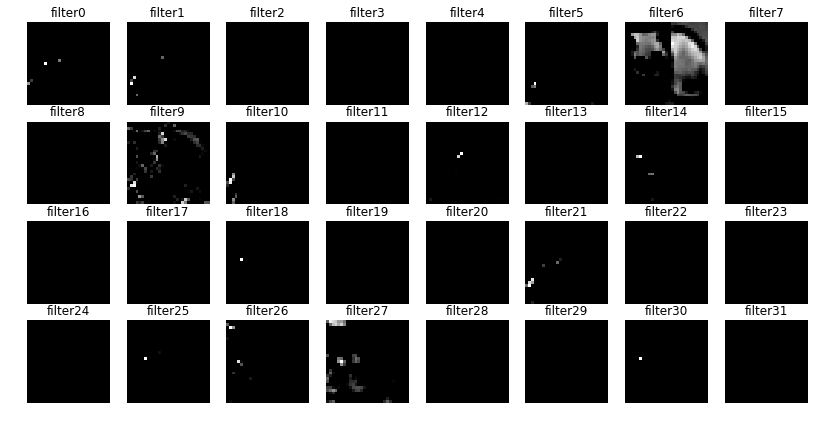

In [16]:
img=cat[6]
fig=plt.figure(figsize=(2,2))
plt.imshow(img)
plt.show()

img = np.expand_dims(img, axis=0)
conv1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_6').output)
conv2_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_7').output)
conv1_features = conv1_output.predict(img)
conv2_features = conv2_output.predict(img)

import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4

print("Output for each filter of first Convolution Layer")
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv1_features[0, :, :, i], cmap='gray')
plt.show()

fig=plt.figure(figsize=(14,7))
print("Output for each filter of second Convolution Layer")
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2_features[0, :, :, i], cmap='gray')
plt.show()

### Inference
It can be seen that the first layer of convolution observes edge features or backgroud or sudden changes that can be obtained by certain well known image-processing convolution kernels such as sobel or laplacian. However, the second convolution layer observes edges and corners which cannot be explained very well. And this is true if we go even further the convolution output cannot be explained but they capture relevant feature which makes it very useful for image classification

### Conclusion

The current model gives us an accuracy of 95.2 % for an unknown test data set but it can yield much better performance with better parameter tunning and more intense training. The model has been provided in the code feel free to twerk with the parameters and play with it.

#### Note:This problem statement and dataset can be found [here](https://www.kaggle.com/c/dogs-vs-cats)